In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from citipy import citipy

In [4]:
# Import the requests library
import requests
# Import the API key
from config import weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=key"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=key


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | kidal
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | valleyview
Processing Record 7 of Set 1 | alta floresta
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | ostrovnoy
Processing Record 11 of Set 1 | yunjinghong
City not found. Skipping...
Processing Record 12 of Set 1 | dunedin
Processing Record 13 of Set 1 | bhayavadar
Processing Record 14 of Set 1 | narsaq
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | tobol
Processing Record 17 of Set 1 | samarai
Processing Record 18 of Set 1 | kloulklubed
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | barcelos
Processing Record 21 of Set 1 | la rioja
Processing Record 22 of Set 1 | pangnirtung
Processing Record 23 of Set 1 | beng

Processing Record 37 of Set 4 | henties bay
Processing Record 38 of Set 4 | lagoa
Processing Record 39 of Set 4 | bambous virieux
Processing Record 40 of Set 4 | pevek
Processing Record 41 of Set 4 | lolua
City not found. Skipping...
Processing Record 42 of Set 4 | hammerfest
Processing Record 43 of Set 4 | salalah
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | seoul
Processing Record 46 of Set 4 | tessalit
Processing Record 47 of Set 4 | souillac
Processing Record 48 of Set 4 | castro
Processing Record 49 of Set 4 | mansion
City not found. Skipping...
Processing Record 50 of Set 4 | phonhong
Processing Record 1 of Set 5 | erdenet
Processing Record 2 of Set 5 | fare
Processing Record 3 of Set 5 | port-cartier
Processing Record 4 of Set 5 | goderich
Processing Record 5 of Set 5 | pidhorodne
Processing Record 6 of Set 5 | chokurdakh
Processing Record 7 of Set 5 | chuy
Processing Record 8 of Set 5 | butaritari
Processing Record 9 of Set 5 | hovd
Processing 

Processing Record 28 of Set 8 | kotel
Processing Record 29 of Set 8 | cururupu
Processing Record 30 of Set 8 | lata
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | fergus
Processing Record 33 of Set 8 | newport
Processing Record 34 of Set 8 | sovetskiy
Processing Record 35 of Set 8 | bosaso
Processing Record 36 of Set 8 | antalaha
Processing Record 37 of Set 8 | vao
Processing Record 38 of Set 8 | homer
Processing Record 39 of Set 8 | padang
Processing Record 40 of Set 8 | uthal
Processing Record 41 of Set 8 | gold coast
Processing Record 42 of Set 8 | barbar
City not found. Skipping...
Processing Record 43 of Set 8 | grand centre
City not found. Skipping...
Processing Record 44 of Set 8 | bereda
Processing Record 45 of Set 8 | sao joao da barra
Processing Record 46 of Set 8 | at-bashi
Processing Record 47 of Set 8 | riyadh
Processing Record 48 of Set 8 | solnechnyy
Processing Record 49 of Set 8 | soyo
Processing Record 50 of Set 8 | do rud
City not

Processing Record 15 of Set 12 | manakara
Processing Record 16 of Set 12 | antofagasta
Processing Record 17 of Set 12 | talcahuano
Processing Record 18 of Set 12 | chumikan
Processing Record 19 of Set 12 | omboue
Processing Record 20 of Set 12 | leningradskiy
Processing Record 21 of Set 12 | saint-denis
Processing Record 22 of Set 12 | shubarshi
Processing Record 23 of Set 12 | sompeta
Processing Record 24 of Set 12 | pyaozerskiy
Processing Record 25 of Set 12 | half moon bay
Processing Record 26 of Set 12 | constitucion
Processing Record 27 of Set 12 | banda aceh
Processing Record 28 of Set 12 | olafsvik
Processing Record 29 of Set 12 | kuito
Processing Record 30 of Set 12 | aporawan
City not found. Skipping...
Processing Record 31 of Set 12 | birobidzhan
Processing Record 32 of Set 12 | ust-maya
Processing Record 33 of Set 12 | aneho
Processing Record 34 of Set 12 | kudligi
Processing Record 35 of Set 12 | katobu
Processing Record 36 of Set 12 | mathathane
Processing Record 37 of Set

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,27.59,71,90,6.91,GL,2021-04-24 20:37:58
1,Kidal,18.4411,1.4078,91.17,6,0,9.35,ML,2021-04-24 20:37:58
2,Yellowknife,62.4560,-114.3525,19.40,53,75,12.66,CA,2021-04-24 20:35:06
3,Ushuaia,-54.8000,-68.3000,55.40,50,75,5.75,AR,2021-04-24 20:33:37
4,Valleyview,55.0667,-117.2859,37.40,32,95,4.61,CA,2021-04-24 20:37:59
5,Alta Floresta,-9.8756,-56.0861,84.20,58,40,3.44,BR,2021-04-24 20:33:10
6,Barrow,71.2906,-156.7887,26.60,80,1,5.06,US,2021-04-24 20:38:00
7,Severo-Kurilsk,50.6789,156.1250,34.56,98,100,6.71,RU,2021-04-24 20:38:00
8,Ostrovnoy,68.0531,39.5131,35.73,99,100,5.75,RU,2021-04-24 20:38:01
9,Dunedin,-45.8742,170.5036,51.01,70,58,5.01,NZ,2021-04-24 20:38:01


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-04-24 20:37:58,77.4840,-69.3632,27.59,71,90,6.91
1,Kidal,ML,2021-04-24 20:37:58,18.4411,1.4078,91.17,6,0,9.35
2,Yellowknife,CA,2021-04-24 20:35:06,62.4560,-114.3525,19.40,53,75,12.66
3,Ushuaia,AR,2021-04-24 20:33:37,-54.8000,-68.3000,55.40,50,75,5.75
4,Valleyview,CA,2021-04-24 20:37:59,55.0667,-117.2859,37.40,32,95,4.61
5,Alta Floresta,BR,2021-04-24 20:33:10,-9.8756,-56.0861,84.20,58,40,3.44
6,Barrow,US,2021-04-24 20:38:00,71.2906,-156.7887,26.60,80,1,5.06
7,Severo-Kurilsk,RU,2021-04-24 20:38:00,50.6789,156.1250,34.56,98,100,6.71
8,Ostrovnoy,RU,2021-04-24 20:38:01,68.0531,39.5131,35.73,99,100,5.75
9,Dunedin,NZ,2021-04-24 20:38:01,-45.8742,170.5036,51.01,70,58,5.01


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

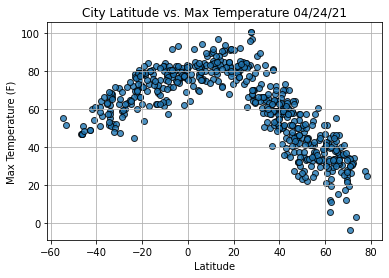

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

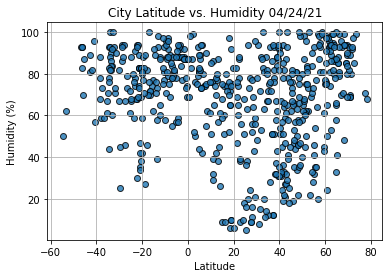

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

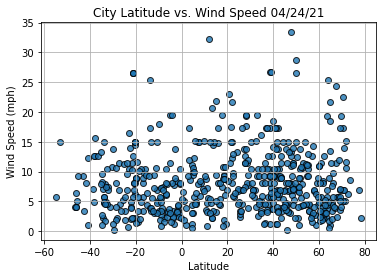

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()